# 1. 학습 관련 기술들

1. 최적화 방법
2. 가중치 매개변수 초깃값,
3. 하이퍼파라미터 설정 방법
4. 오버피팅 대응책(가중치 감소, 드롭아웃)

## 2.1. 매개변수 갱신

- 신경망 학습 목적 
  - 손실 함수 값을 가능한 낮추는 매개변수를 찾는 것

### 2.1.1 확률적 경사 하강법(SGD)

- 학습 데이터에서 배치 크기만큼 데이터를 뽑아서 손실 함수를 얻은다음 학습하는 방법
- 수식
$$
W \leftarrow W - \eta \frac{\delta L}{\delta W}
$$


해석 : W(가중치)를 W에 대한 손실 함수의 기울기방향으로 학습률 eta 만큼 이동시킨다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grad[key] # 파라미터를 기울기 방향으로 lr 보폭으로 이동

- 의사코드

network = TwoLayerNet(인자) 

optimizer = SGD()

for i in range(10000):
    
    x_batch, t_batch = get_mini_batch(인자)
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    
    
1. 네트워크 설정
2. 최적화 방법 설정
3. 배치 데이터 생성
4. 배치 데이터의 기울기 구하기
5. 파라미터 갱신

### 2.1.2 SGD의 단점

- 문제에 따라서는 비효율적일 때가 존재
    1. Local minima가 존재할 경우 학습이 제대로 완료 되지 않을 수 있음.
    2. 기울기의 방향이 최소점으로 바로 향하지 않아 학습이 비효율적이게 될 수 있음.
  

### 2.1.3. 모멘텀

- 공이 굴러가듯 학습에 관성의 요소를 넣어준 것
- SGD에서의 지그재그로 움직이는 움직임이 줄어든다.

- 수식
$$
v \leftarrow \alpha v - \eta \frac{\delta L}{\delta W} \\
W \leftarrow W - v
$$

In [2]:
# 모멘텀 구현
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

### 2.1.4 AdaGrad

- 매개변수 전체의 학습률을 일괄적으로 낮추는 방법

- 수식
$$
h \leftarrow h + \frac{\delta L}{\delta W} \odot \frac{\delta L}{\delta W} \\
W \leftarrow W - \eta \frac{1}{\sqrt{h}} \frac{\delta L}{\delta W}
$$

학습률을 root(h)만큼 계속해서 줄여준다.

In [3]:
# AdaGrade 구현
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, paramas, grads):
        if self.h == None:
            self.h = {}
            for key, val in paramas.item():
                self.h[key] = np.zeros_like(val)
            
        for key in params.key():
            self.h[key] +=  grads[key] * grads[key]
            paramas[key] -= lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 2.1.5 Adam
 - AdaGrad와 Momentum을 합친 방법 구현은 생략 

### 2.1.6. 어느 방법을 사용할까?

- 각자 장단점이 있기에 정해진 좋은 방법은 없으며 여러 방법을 사용해봐야한다.

# 3. 가중치의 초깃값

## 3.1. 초깃값을 0으로 하면?

- 학습이 제대로 이루어지지 않는다.
- 가중치의 값을 균일한 값으로 설정하면 역전파를 할 때 모든 가중치 값이 똑같이 갱신된다.
- 따라서 가중치를 여러개 같게하는 의미가 없다.

## 3.2. 은닉층의 활성화값 분포

- 가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는가?
- Sigmoid 함수를 사용하는 5층 신경망으로 실험

In [4]:
# 가중치를 정규분포를 그대로 할당할 경우
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터 생성
node_num = 100 # 은닉층 뉴런 수
hidden_layer_size = 5
activations = {} # 활성화 결과 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1 # 표준편차가 1인 정규분포 가중치 생성
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

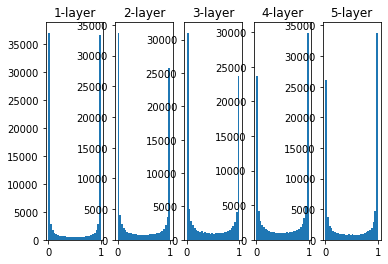

In [5]:
# 표준편차가 1인 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 위의 그래프를 보게되면 각 가중치값이 0과 1에 치우쳐 분포되어 있다.
- sigmoid 함수에서 출력이 0에 가까워지면 미분값도 0에 가까워져 결국 미분값이 사라지게 된다.
- 위와 같이 가중치 값이 0과 1에 가까워져서 기울기가 사라지는것을 기울기 소실(Gradient vanishing)이라고 합니다.

In [6]:
x = np.random.randn(1000, 100) 
node_num = 100 
hidden_layer_size = 5
activations = {} 
w = np.random.randn(node_num, node_num) * 0.01 # 무작위값을 설정할때 푠준편차가 0.01인 정규분포 설정

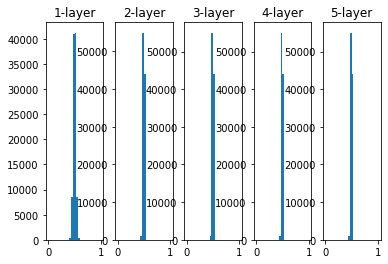

In [7]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 0.5 부근에 집중됨
- 이는 기울기 소실 문제는 일어나지 않았지만 표현력에 문제가 생김
- 뉴런을 여러개 만든 이유가 없음

#### Xavier 초기값을 사용

- 표준편차를 앞계층의 노드 개수가 n개라면 root(n)을 사용하는 초기값

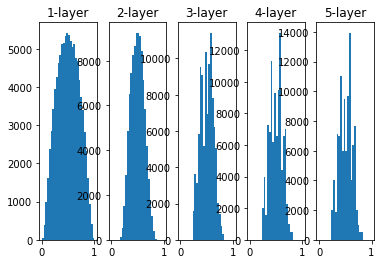

In [8]:
x = np.random.randn(1000, 100) 
node_num = 100 
hidden_layer_size = 5
activations = {} 
w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 3.3. ReLU를 사용할 때의 가중치 초기값

- Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 한다.
- Sigmoid, ReLU는 비선형 함수이므로 다른 초기값을 추천한다.


- ReLU의 경우 Kaiming He의 이름을 딴 He 초기값을 사용한다.
- He 초기값은 앞 계층의 노드가 n개일 때, 표준편차가 root(2/n)인 정규분포를 사용


#### ReLU 활성화 함수, He 초기값 사용

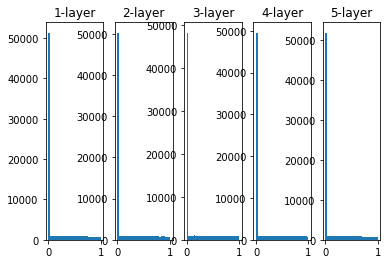

In [9]:
def ReLU(x):
    return np.maximum(0, x)
        

# He 초기값을 사용한 가중치 분포
x = np.random.randn(1000, 100) 
node_num = 100 
hidden_layer_size = 5
activations = {} 
w = np.random.randn(node_num, node_num) * np.sqrt(2/node_num)

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z
    

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#### ReLU 활성화 함수, 표준분포가 0.01인   사용

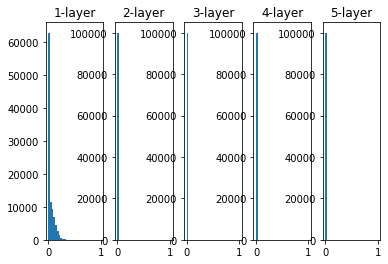

In [10]:
x = np.random.randn(1000, 100) 
node_num = 100 
hidden_layer_size = 5
activations = {} 
w = np.random.randn(node_num, node_num) * 0.01 # 무작위값을 설정할때 푠준편차가 0.01인 정규분포 설정

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z
    

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#### ReLU 활성화 함수, Xavier 초기값을 사용할 경우

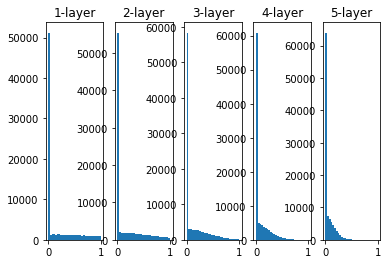

In [12]:
x = np.random.randn(1000, 100) 
node_num = 100 
hidden_layer_size = 5
activations = {} 
w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z
    

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 4. 배치 정규화

## 4.1. 배치 정규화 알고리즘

### 장점
1. 학습을 빨리 진행할 수 있다.
2. 초기값에 크게 의존하지 않는다.
3. 오버피팅을 억제한다. 

- 배치 정규화의 그림 예시
![배치_정규화를_사용한_신경망의_예](./images/batch_nor.png)


- 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화 한다.
$$
\mu_B \leftarrow \frac{1}{m} \sum^m_{i=1}x_i \\
\sigma^2_B \leftarrow \frac{1}{m} \sum^m_{i=1}(x_i - \mu_B)^2 \\ 
\hat{x}_i \leftarrow \frac{x_i - \mu_B}{\sqrt{\sigma^2_B+\epsilon}}
$$

- 기호 의미
 1. B -> 미니배치
 2. m -> 미니배치의 m 번째의 입력데이터
 3. μ -> 평균
 4. σ -> 미니 배치에 대한 분산
 5. ε -> 매우 작은 값

- 배치 정규화를 하는 방법
    1. 미니배치의 평균과 분산을 계산
    2. 입력 데이터 평균이 0, 분산이 1이 되게 정규화
    3. 배치 정규화 계층마다 정규화된 데이터에 확대와 이동변환 수행

- 위 식의 3번째 식은 미니배치 입력 데이터 평균0, 분산 1인 데이터로 변환해준다.

- 확대와 이동 변환 수식
$$
y_i \leftarrow \gamma \hat{x}_i + \beta
$$
- γ = 1, β= 0부터 시작하고, 학습하면서 적절한 값으료로 조정한다.


- 배치 정규화의 그래프 예시
![배치_정규화_그래프](./images/batch_graph.png)

# 5. 가중치 감소(weight decay)

- 학습 과정에서 큰 가중치에 대해서는 상응하는 큰 페널티를 부과하는 방법
- 오버피팅을 억제하는 방법 중 하나

## 5.1. 가중치 감소 방법
1. 가중치의 제곱 노름을 손실함수에 더함(L2)

- L2 노름
    - 모든 가중치 각각의 손실 함수에 (1/2)λW<sup>2</sup>을 더한다.

# 6. 드롭아웃(dropout)

- 뉴런을 임의로 삭제하면서 학습하는 방법
- 은닉층의 뉴련을 무작위로 골라 삭제


- 드롭아웃의 예시 그림
![드롭아웃](./images/dropout.png)

## 장점

1. 오버피팅 억제
2. 표현력을 높힐 수 있음